<p style="background-color:#ff0000;font-family:Georgia;color:#ff0000;font-size:105%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:17px;border-color:#ff0000;"></p>
<h1 style="color:black;font-size:50px;font-family:Georgia;text-align:center;">👨‍💻<strong>Customer <strong style="color:#ff0000;font-size:47px;font-family:Georgia;">Segmentation<strong style="color:black;font-size:50px;font-family:Georgia;"> by Enhanced RFM</strong></strong></strong>👨‍💻</h1>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;">This Notebook introduce new dimension called Inter-Purchase Time(T) to the traditional RFM (Recency, Frequency and Monatery) Model. New attribute "T" will include the customer dynamic purchasing behaviour within their shopping cycle.<br>
But why RFMT? although RFM model is been in use predominantly across industries..<br>
Well, lets quickly look at some facts.<br>
RFM Model was proposed by Hughes in 1994 to analyze customer behaviors. Implementing RFM Model permanently is challenging due to the unpredictable nature of human behavior and the potential for inaccurate results. Therefore, it is vital to include criteria which explain the buying habit of individuals. So lets move forward into context. <br>

<p style="background-color:#ff0000;font-family:Georgia;color:#ff0000;font-size:105%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:17px;border-color:#ff0000;"></p>


<h1 style="color:black;font-size:40px;font-family:Georgia;text-align:center;">👨‍💻<strong>Introduction</strong>👨‍💻</h1>
<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;">Customer segmentation is a process of dividing all customers into distinct groups that share similar characteristics, such as demographics, interests, patterns, or location, and can help a business focus marketing efforts and resources on valuable, loyal customers to achieve business goals.Customer segmentation can be performed with customers’ demographic, geographic, behavioral, and psychological data.Digital business has increased rapidly during covid-19 and it is extremely important to maintain long-term relationship with customer.In US, 85% of new product launch was reported failed because for poor market segmentaton.therefore, more study and improvments is required on the consumer behavioural and engagement.</p>

<p style="background-color:#ff0000;font-family:Georgia;color:#ff0000;font-size:105%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:17px;border-color:#ff0000;"></p>

<h1 style="color:black;font-size:40px;font-family:Georgia;text-align:center;">👨‍💻<strong>Table <strong style="color:#ff0000;font-size:37px;font-family:Georgia;">Of <strong style="color:black;font-size:40px;font-family:Georgia;">The <strong style="color:#ff0000;font-size:37px;font-family:Georgia;">Contents</strong></strong></strong></strong>👨‍💻</h1>

* [Importing The Libraries.](#1)
* [Loading & Reading The Dataset.](#2)
* [Exploring Dataset.](#3)
* [Data Wrangling.](#4)
* [Exploratory Data Analysis.](#5)
* [New Feature Extraction.](#6)
* [Modelling with K-Means Algorithm.](#7)
* [Model Evaluation.](#8)


<a id="1"></a>
<p style="background-color:#ff0000;font-family:Georgia;color:#ff0000;font-size:105%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:17px;border-color:#ff0000;"></p>
<h1 style="color:black;font-size:32px;font-family:Georgia;text-align:center;">👨‍💻<strong>Importing <strong style="color:#ff0000;font-size:30px;font-family:Georgia;">The <strong style="color:black;font-size:32px;font-family:Georgia;">Libraries</strong></strong></strong>👨‍💻</h1>

In [314]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from numpy import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<a id="2"></a>
<p style="background-color:#ff0000;font-family:Georgia;color:#ff0000;font-size:105%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:15px;border-color:#ff0000;"></p>
<h1 style="color:black;font-size:32px;font-family:Georgia;text-align:center;">👨‍💻<strong>Loading <strong style="color:#ff0000;font-size:30px;font-family:Georgia;">& <strong style="color:black;font-size:32px;font-family:Georgia;">Reading <strong style="color:#ff0000;font-size:30px;font-family:Georgia;">The <strong style="color:black;font-size:32px;font-family:Georgia;">Dataset </strong></strong></strong></strong></strong>👨‍💻</h1>

In [315]:
#lETS READ THE DATASET...
data = pd.read_csv("online_retail_II.csv")
print("-"*50)
print(" Data imported successfully!!")
data.head(3).style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

--------------------------------------------------
 Data imported successfully!!


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.950000,13085.000000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750000,13085.000000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.750000,13085.000000,United Kingdom


<a id="3"></a>
<p style="background-color:#ff0000;font-family:Georgia;color:#ff0000;font-size:105%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:15px;border-color:#ff0000;"></p>
<h1 style="color:black;font-size:32px;font-family:Georgia;text-align:center;">👨‍💻<strong>Exploring <strong style="color:#ff0000;font-size:30px;font-family:Georgia;">Information <strong style="color:black;font-size:32px;font-family:Georgia;">Of <strong style="color:#ff0000;font-size:30px;font-family:Georgia;">The <strong style="color:black;font-size:32px;font-family:Georgia;">Dataset </strong></strong></strong></strong></strong>👨‍💻</h1>

In [316]:
pd.set_option('display.max_columns', None) 
def data_overview(df, head=5):
    print(" SHAPE OF DATASET ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" HEAD ".center(125,'-'))
    print(df.head(head))
    print("DATA TYPES".center(125,'-'))
    print(data.dtypes.value_counts())
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False))
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" STATISTICS OF DATA ".center(125,'-'))
    print(df.describe(include="all"))
    print("DATA INFO".center(125,'-'))
    print(df.info())
    
    
data_overview(data)

------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:1067371
Columns:8
------------------------------------------------------------ HEAD -----------------------------------------------------------
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  

<a id="4"></a>
<p style="background-color:#ff0000;font-family:Georgia;color:#ff0000;font-size:105%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:15px;border-color:#ff0000;"></p>
<style>
    .header {
        text-align: center;font-family: Georgia;font-size: 65%;color: purple;
    }
</style>

<div class="header">
    <h1>Point to be noted</h1>
</div>


<div style="text-align: left;">
  <ul style="list-style-type: disc; font-family: Georgia; color: #000000; font-size: 110%;">
    <li>The Dataset has Rows: 1067371 & Columns:8</li>
    <li>The Dataset has 3 types of columns: strings(5), integer(1), float(2)</li>
    <li>The Dataset has Missing values in Customer ID (243007) and Description (4382)</li>
    <li>Invoice starts with the 'c' needs to be cleaned as it is cancelled transaction</li>
    <li>The Dataset has duplicates</li>
    <li>Aslo check for negative value and outliers in Quantity and Price</li>
  </ul>
</div>


<a id="4"></a>
<p style="background-color:#ff0000;font-family:Georgia;color:#ff0000;font-size:105%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:15px;border-color:#ff0000;"></p>
<h1 style="color:black;font-size:32px;font-family:Georgia;text-align:center;">👨‍💻<strong>Data <strong style="color:#ff0000;font-size:30px;font-family:Georgia;"><strong style="color:#ff0000;font-size:30px;font-family:Georgia;">Wrangling</strong></strong></strong></strong>👨‍💻</h1>

<h1 style="color:black;font-size:16px;font-family:Georgia;text-align:left;">1️⃣<strong>Dealing with Missing values<strong>

In [317]:
#  Removing NaN's in Customer ID
print("Shape of data before removing NaN's CustomerID",data.shape)
data.dropna(subset="Customer ID",axis=0,inplace=True)
print("Shape of data after removing NaN's CustomerID",data.shape)

Shape of data before removing NaN's CustomerID (1067371, 8)
Shape of data after removing NaN's CustomerID (824364, 8)


In [318]:
print("Missing values in each column after cleaning customerID :\n",data.isnull().sum())

Missing values in each column after cleaning customerID :
 Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


 <ul style="list-style-type: disc; font-family: Georgia; color: #006400; font-size: 110%;">
    <li>Data looks fine now. (luckily NaNs from Description was also alligned with missing customer ID)</li>

<h1 style="color:black;font-size:16px;font-family:Georgia;text-align:left;">2️⃣<strong>Removing cancelled products from invoice<strong>

In [319]:
#using one's compliment operator (~) we can unselect all the Invoice column which doesnt contain "C".
data = data[~data.Invoice.str.contains('C',na=False)]
print("Dataset is free from cancelled products information")

Dataset is free from cancelled products information


<h1 style="color:black;font-size:16px;font-family:Georgia;text-align:left;">3️⃣<strong>Removing Duplicates<strong>

In [320]:
# Removing duplicates (Values in all columns are identical)
print("Number of duplicates before cleaning:",data.duplicated().sum())
data = data.drop_duplicates(keep="first")
print("Number of duplicates after cleaning:",data.duplicated().sum())

Number of duplicates before cleaning: 26125
Number of duplicates after cleaning: 0


<h1 style="color:black;font-size:16px;font-family:Georgia;text-align:left;">4️⃣<strong>Checking for negative value<strong>

In [321]:
print("Negative value in Quantity is:",(data.Quantity<0).sum())
print("Negative value in Price is:",(data.Price<0).sum())

Negative value in Quantity is: 0
Negative value in Price is: 0


<h1 style="color:black;font-size:16px;font-family:Georgia;text-align:left;">5️⃣<strong>Cleaning Outliers<strong>

In [322]:
#defining function to remove outliers w.r.t its thresholds
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

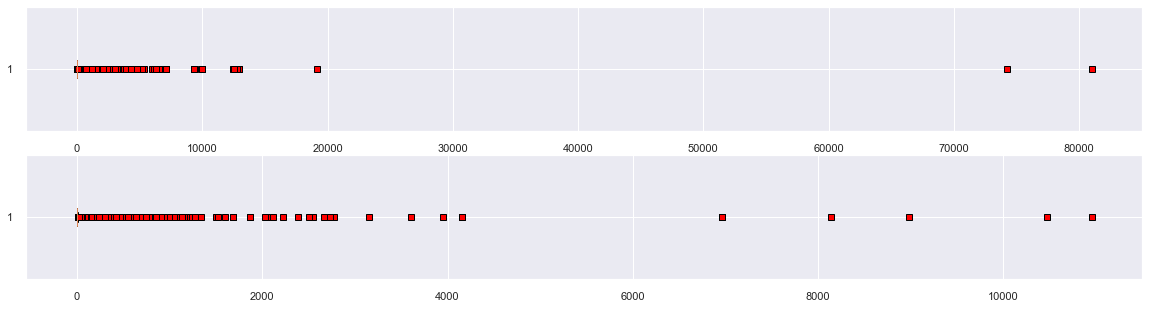

In [323]:
# Observing them before removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
col_list = ["Quantity","Price"]
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

In [324]:
# Applying the functions for remove the outlier.
replace_with_threshold(data, "Quantity")
replace_with_threshold(data, "Price")

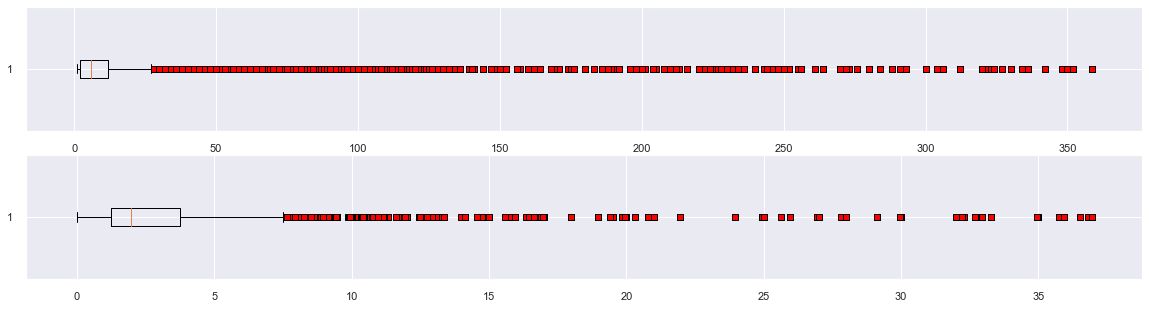

In [325]:
# Observing them after removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

<a id="5"></a>
<p style="background-color:#ff0000;font-family:Georgia;color:#ff0000;font-size:105%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:15px;border-color:#ff0000;"></p>
<h1 style="color:black;font-size:32px;font-family:Georgia;text-align:center;">👨‍💻<strong>EDA <strong style="color:#ff0000;font-size:30px;font-family:Georgia;"><strong style="color:#ff0000;font-size:30px;font-family:Georgia;">: Feature Engineering</strong></strong></strong></strong>👨‍💻</h1>

In [326]:
#Creating new feature Revenue
data["Revenue"] = data["Quantity"] * data["Price"]

In [327]:
#Creating Features for RFM Model
#Changing data type to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [328]:
print("Max date :",data["InvoiceDate"].max())
print("Min date :",data["InvoiceDate"].min())

Max date : 2011-12-09 12:50:00
Min date : 2009-12-01 07:45:00


In [329]:
#RFM Featuring

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09.
Latest_Date = dt.datetime(2011,12,10)

#Creating RFM features with subset of customerID
RFM = data.groupby('Customer ID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                                 'Invoice': lambda x: x.nunique(), 
                                                 "Revenue": lambda x: x.sum()})
                                
RFM['InvoiceDate'] = RFM['InvoiceDate'].astype(int)

#Renaming column names to Recency, Frequency and Monetary
RFM.rename(columns={'InvoiceDate': 'Recency', 
                         'Invoice': 'Frequency', 
                         'Revenue': 'Monetary'}, inplace=True)

RFM.reset_index().head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Customer ID,Recency,Frequency,Monetary
0,12346.000000,325,12,745.700000
1,12347.000000,2,8,4921.530000
2,12348.000000,75,5,1991.860000
3,12349.000000,18,4,3786.500000
4,12350.000000,310,1,331.340000


<a id="6"></a>
<p style="background-color:#ff0000;font-family:Georgia;color:#ff0000;font-size:105%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:15px;border-color:#ff0000;"></p>
<h1 style="color:black;font-size:32px;font-family:Georgia;text-align:center;">👨‍💻<strong>Introducing New Feature : <strong style="color:#ff0000;font-size:30px;font-family:Georgia;"><strong style="color:#ff0000;font-size:30px;font-family:Georgia;">Interpurchase-Time</strong></strong></strong></strong>👨‍💻</h1>



<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;">The Fourth varibale of RFM, InterPurchase Time, is a measure of average time gap between total shopping trips by a customer. The Interpurchase Time is calcluted as fallows : </p>

<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;">T = L/(F-1) = (Tn - T1)/(F-1) </p>

<div style="text-align: left;">
  <ul style="list-style-type: disc; font-family: Georgia; color: #000000; font-size: 110%;">
    <li>T --> Interpurchase Time</li>
    <li>L --> Shopping Cycle</li>
    <li>F --> Frequency</li>
    <li>T1 --> First purchase</li>
    <li>Tn --> Last purchase</li>
    
      
  </ul>
</div>

Note: We consider only those customers who made purchase more than once.

In [330]:
RFM = RFM[(RFM["Frequency"]>1)]
RFM.head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary
Customer ID,,,
12346.000000,325,12,745.700000
12347.000000,2,8,4921.530000
12348.000000,75,5,1991.860000
12349.000000,18,4,3786.500000
12352.000000,36,10,2098.940000


In [331]:
Shopping_Cycle = data.groupby('Customer ID').agg({'InvoiceDate': lambda x: ((x.max() - x.min()).days)})

In [332]:
RFM["Shopping_Cycle"] = Shopping_Cycle
RFM.head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary,Shopping_Cycle
Customer ID,,,,
12346.000000,325,12,745.700000,400
12347.000000,2,8,4921.530000,402
12348.000000,75,5,1991.860000,362
12349.000000,18,4,3786.500000,570
12352.000000,36,10,2098.940000,356


In [333]:
RFM["Interpurchase_Time"] = RFM["Shopping_Cycle"] // RFM["Frequency"]
RFMT = RFM[["Recency","Frequency","Monetary","Interpurchase_Time"]]
RFMT.head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary,Interpurchase_Time
Customer ID,,,,
12346.000000,325,12,745.700000,33
12347.000000,2,8,4921.530000,50
12348.000000,75,5,1991.860000,72
12349.000000,18,4,3786.500000,142
12352.000000,36,10,2098.940000,35


In [334]:
RFMT.Recency.describe()

count    4255.000000
mean      142.181904
std       168.613472
min         0.000000
25%        18.000000
50%        59.000000
75%       225.000000
max       738.000000
Name: Recency, dtype: float64

Text(0.5, 1.0, 'Distribution of Recency')

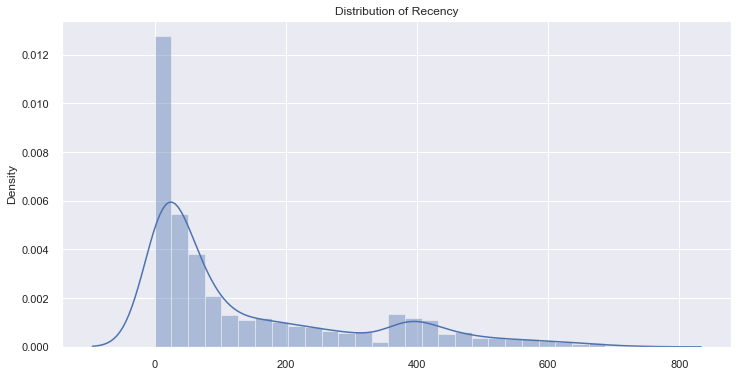

In [335]:
plt.figure(figsize=(12,6))
sns.distplot(x=RFMT['Recency'])
plt.title('Distribution of Recency')

Recency distribution is right skewed

In [336]:
RFMT.Frequency.describe()

count    4255.000000
mean        8.307638
std        14.808496
min         2.000000
25%         3.000000
50%         5.000000
75%         9.000000
max       398.000000
Name: Frequency, dtype: float64

Text(0.5, 1.0, 'Distribution of Frequency')

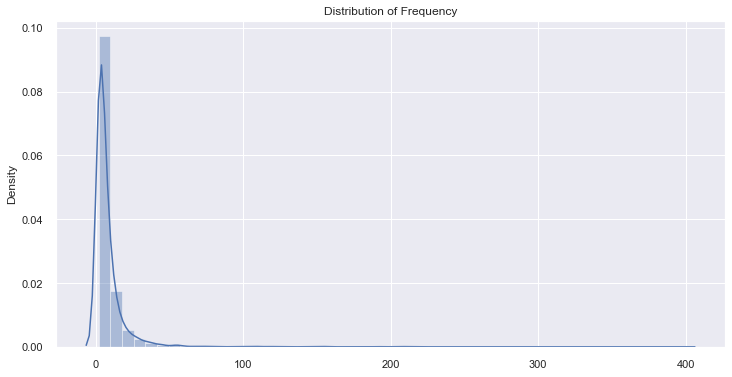

In [337]:
plt.figure(figsize=(12,6))
sns.distplot(x=RFMT['Frequency'])
plt.title('Distribution of Frequency')

Frequency distribution is skewed to extreme right

In [338]:
RFMT['Monetary'].describe()

count      4255.000000
mean       3718.897597
std       15530.562612
min          24.350000
25%         678.505000
50%        1346.970000
75%        3121.655000
max      534839.920000
Name: Monetary, dtype: float64

Text(0.5, 1.0, 'Distribution of Monetary')

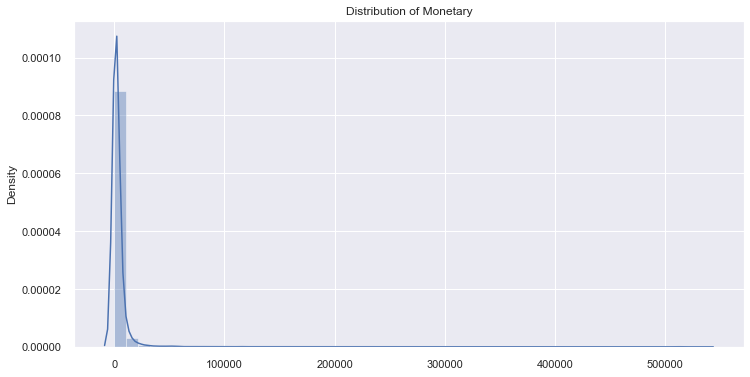

In [339]:
plt.figure(figsize=(12,6))
sns.distplot(x=RFMT['Monetary'])
plt.title('Distribution of Monetary')

Monetary distribution is skewed to extreme right

In [340]:
RFMT['Interpurchase_Time'].describe()

count    4255.000000
mean       68.909048
std        53.228344
min         0.000000
25%        30.000000
50%        56.000000
75%        94.000000
max       357.000000
Name: Interpurchase_Time, dtype: float64

Text(0.5, 1.0, 'Distribution of Interpurchase_Time')

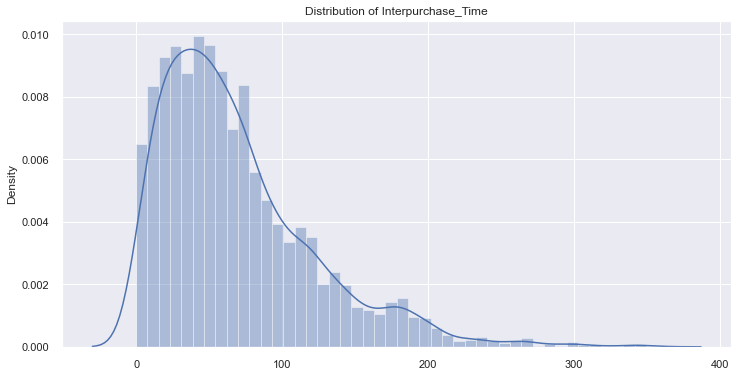

In [341]:
plt.figure(figsize=(12,6))
sns.distplot(x=RFMT['Interpurchase_Time'])
plt.title('Distribution of Interpurchase_Time')

Interpurchase_Time distribution is skewed to right

<h1 style="color:#adff2f;font-size:25px;font-family:Georgia;text-align:center;"><strong>😀RFMT Model is ready for segmentation😀 <strong style="color:#adff2f;font-size:30px;font-family:Georgia;"><strong </h1>

<a id="7"></a>
<p style="background-color:#ff0000;font-family:Georgia;color:#ff0000;font-size:105%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:15px;border-color:#ff0000;"></p>
<h1 style="color:black;font-size:32px;font-family:Georgia;text-align:center;">👨•💻<strong>Modelling  <strong style="color:#ff0000;font-size:30px;font-family:Georgia;"><strong style="color:#ff0000;font-size:30px;font-family:Georgia;">with KMeans Algorithm</strong></strong></strong></strong>👨•💻</h1>

In [342]:
# # Finding initial K value using Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # Taking random range till 15.
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(RFMT)
    centers = clusterer.cluster_centers_

    score = silhouette_score(RFMT, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.9847564017057793
For n_clusters = 3, silhouette score is 0.9520197108885946
For n_clusters = 4, silhouette score is 0.9018816030056632
For n_clusters = 5, silhouette score is 0.8080428286346221
For n_clusters = 6, silhouette score is 0.8003793650040743
For n_clusters = 7, silhouette score is 0.7331921774616406
For n_clusters = 8, silhouette score is 0.7348204669973117
For n_clusters = 9, silhouette score is 0.6623240224783083
For n_clusters = 10, silhouette score is 0.6714404048162055
For n_clusters = 11, silhouette score is 0.6273319945144985
For n_clusters = 12, silhouette score is 0.6119808383087695
For n_clusters = 13, silhouette score is 0.5945814752628504
For n_clusters = 14, silhouette score is 0.575093901929843
For n_clusters = 15, silhouette score is 0.5472615142512791


In [343]:
# K =2 for silhouette score is 0.9847564017057793
#Fitting KMeans Model
kmeans = KMeans(n_clusters=2,max_iter=50)
kmeans.fit(RFMT)

KMeans(max_iter=50, n_clusters=2)

In [344]:
RFMT["Clusters"]=kmeans.labels_
RFMT.head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary,Interpurchase_Time,Clusters
Customer ID,,,,,
12346.000000,325,12,745.700000,33,0
12347.000000,2,8,4921.530000,50,0
12348.000000,75,5,1991.860000,72,0
12349.000000,18,4,3786.500000,142,0
12352.000000,36,10,2098.940000,35,0


<a id="8"></a>
<p style="background-color:#ff0000;font-family:Georgia;color:#ff0000;font-size:105%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:15px;border-color:#ff0000;"></p>
<h1 style="color:black;font-size:32px;font-family:Georgia;text-align:center;">👨‍💻<strong> Model : <strong style="color:#ff0000;font-size:30px;font-family:Georgia;"><strong style="color:#ff0000;font-size:30px;font-family:Georgia;">Evaluation</strong></strong></strong></strong>👨‍💻</h1>

In [345]:
# how well the clusters are?:
#centriods
kmeans.cluster_centers_

array([[1.42410546e+02, 8.06120527e+00, 3.21545023e+03, 6.90134181e+01],
       [3.42857143e+00, 1.57857143e+02, 3.09239529e+05, 5.57142857e+00]])

<function matplotlib.pyplot.show(close=None, block=None)>

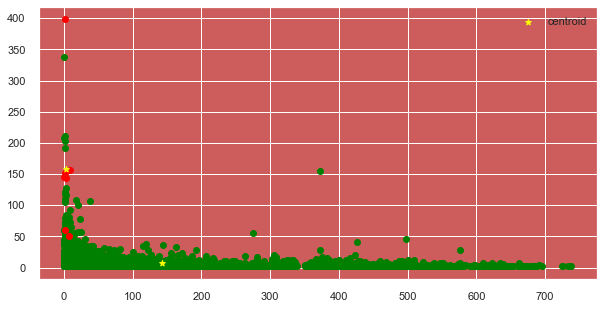

In [346]:
# grouping the data in accorandance with each cluster seperately
one = RFMT[RFMT["Clusters"]==0]
two = RFMT[RFMT["Clusters"]==1]


#Checking the quality of clustering in the data set
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("#cd5c5c")
plt.scatter(one["Recency"],one["Frequency"],color='green')
plt.scatter(two["Recency"],two["Frequency"],color='red')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",marker="*",label="centroid")
plt.legend()
plt.show 

In [347]:
RFMT.head(5)

,Recency,Frequency,Monetary,Interpurchase_Time,Clusters
Customer ID,,,,,
12346.0,325,12,745.70,33,0
12347.0,2,8,4921.53,50,0
12348.0,75,5,1991.86,72,0
12349.0,18,4,3786.50,142,0
12352.0,36,10,2098.94,35,0


Text(0.5, 1.0, 'Recency v/s Clusters')

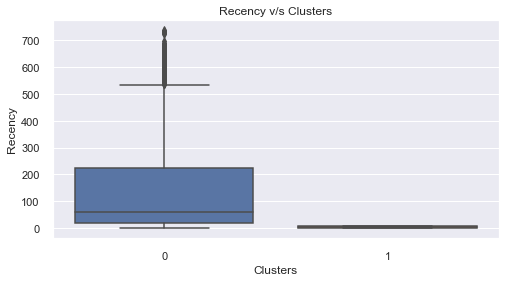

In [348]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(x="Clusters",y="Recency",data=RFMT).set_title("Recency v/s Clusters")

Text(0.5, 1.0, 'Frequency v/s Clusters')

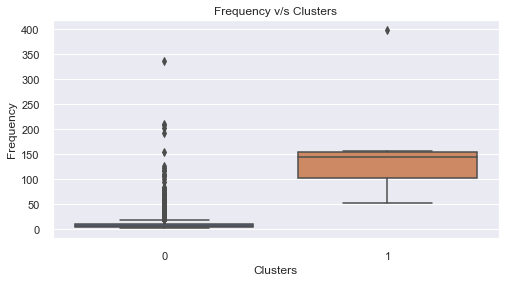

In [349]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(x="Clusters",y="Frequency",data=RFMT).set_title("Frequency v/s Clusters")

Text(0.5, 1.0, 'Monetary v/s Clusters')

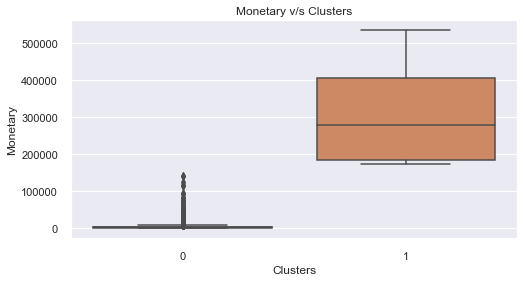

In [350]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(x="Clusters",y="Monetary",data=RFMT).set_title("Monetary v/s Clusters")

Text(0.5, 1.0, 'Interpurchase_Time v/s Clusters')

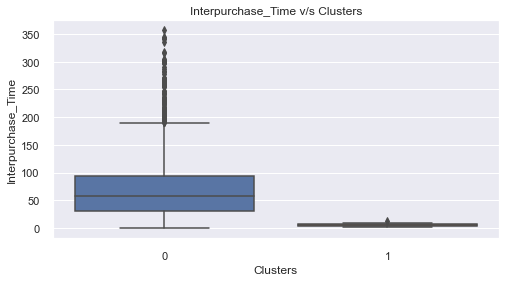

In [351]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(x="Clusters",y="Interpurchase_Time",data=RFMT).set_title("Interpurchase_Time v/s Clusters")

<p style= "font-family:Georgia;color:black;font-size:20px;text-align:center;">Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 
    Score closer to 1, higher the cluster distinguished. </p>

In [352]:
from sklearn.metrics import silhouette_score
print("Silhouette score :",silhouette_score(RFMT, kmeans.labels_, metric='euclidean'))

Silhouette score : 0.9847564017059128


<p style= "font-family:Georgia;color:black;font-size:20px;text-align:center;">Silhouette score of 0.984 proves that the cluster obtained are well classified. The data points in same group possess similar behaviour than the data point of other group.  </p>

<a id="8"></a>
<p style="background-color:#ff0000;font-family:Georgia;color:#ff0000;font-size:105%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:15px;border-color:#ff0000;"></p>
<h1 style="color:black;font-size:32px;font-family:Georgia;text-align:center;">👨‍💻<strong> Segment : <strong style="color:#ff0000;font-size:30px;font-family:Georgia;"><strong style="color:#ff0000;font-size:30px;font-family:Georgia;">Scoring</strong></strong></strong></strong>👨‍💻</h1>

In [353]:
# Lets create bins and assign scores for RFMT value
bins1 = np.linspace(RFMT["Recency"].min(),RFMT["Recency"].max(),6)
RFMT["r_score"] = pd.cut(RFMT["Recency"],bins1,labels=[5,4,3,2,1],include_lowest=True)

bins2 = np.linspace(RFMT["Frequency"].min(),RFMT["Frequency"].max(),6)
RFMT["f_score"] = pd.cut(RFMT["Frequency"],bins2,labels=[1,2,3,4,5],include_lowest=True)

bins3 = np.linspace(RFMT["Monetary"].min(),RFMT["Monetary"].max(),6)
RFMT["m_score"] = pd.cut(RFMT["Monetary"],bins3,labels=[1,2,3,4,5],include_lowest=True)

RFMT["RFMT SCORE"] = RFMT["r_score"].astype(str) + RFMT["f_score"].astype(str)
RFMT.head()

,Recency,Frequency,Monetary,Interpurchase_Time,Clusters,r_score,f_score,m_score,RFMT SCORE
Customer ID,,,,,,,,,
12346.0,325,12,745.70,33,0,3,1,1,31
12347.0,2,8,4921.53,50,0,5,1,1,51
12348.0,75,5,1991.86,72,0,5,1,1,51
12349.0,18,4,3786.50,142,0,5,1,1,51
12352.0,36,10,2098.94,35,0,5,1,1,51


In [354]:
# creating dictionary to name each segments
dict_seg = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

RFMT['segment'] = RFMT['RFMT SCORE'].replace(dict_seg, regex = True)
RFMT.head()

,Recency,Frequency,Monetary,Interpurchase_Time,Clusters,r_score,f_score,m_score,RFMT SCORE,segment
Customer ID,,,,,,,,,,
12346.0,325,12,745.70,33,0,3,1,1,31,about_to_sleep
12347.0,2,8,4921.53,50,0,5,1,1,51,new_customers
12348.0,75,5,1991.86,72,0,5,1,1,51,new_customers
12349.0,18,4,3786.50,142,0,5,1,1,51,new_customers
12352.0,36,10,2098.94,35,0,5,1,1,51,new_customers


In [355]:
#lets segregate RFMT frame w.r.t its cluster
c1 = RFMT[RFMT["Clusters"]==0]
c2 =RFMT[RFMT["Clusters"]==1]

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_1148\2623351212.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


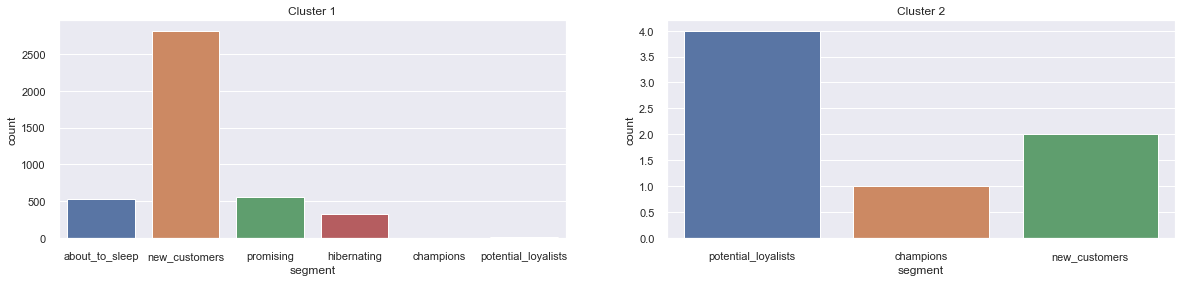

In [356]:
#Lets check who all are there in each clusters
sns.set(rc={"figure.figsize":(20, 4)})
fig, ax =plt.subplots(1,2)
sns.countplot(x="segment",data=c1,ax=ax[0]).set_title("Cluster 1")
sns.countplot(x="segment",data=c2,ax=ax[1]).set_title("Cluster 2")
fig.show()

Segments Description
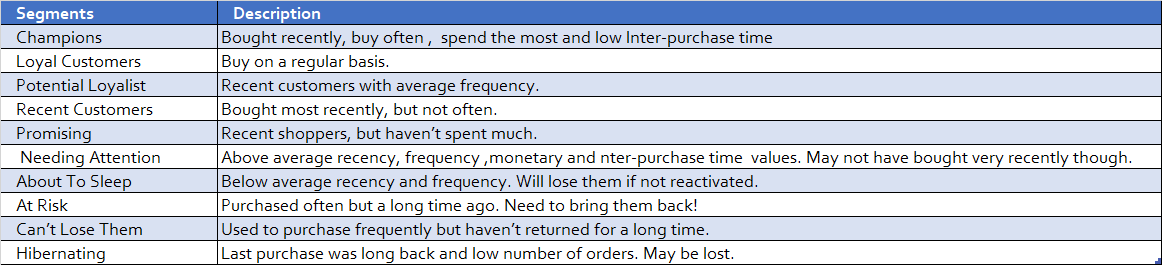


Outcome and Summary:

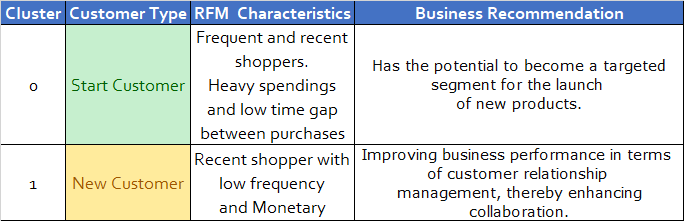